In [12]:
import torch.nn as nn
import torch
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

%matplotlib inline

In [13]:
class VGG11(nn.Module):
    def __init__(self, in_channels=3, num_classes=10):
        super(VGG11,self).__init__()
        self.in_channels = in_channels
        self.num_classes = num_classes

        self.conv1 = nn.Conv2d(self.in_channels, 64, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding="same")
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding="same")
        self.relu4 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding="same")
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(512, 512, kernel_size=3, padding="same")
        self.relu6 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv7 = nn.Conv2d(512, 512, kernel_size=3, padding="same")
        self.relu7 = nn.ReLU()
        self.conv8 = nn.Conv2d(512, 512, kernel_size=3, padding="same")
        self.relu8 = nn.ReLU()
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fcn = nn.Sequential(
            nn.Linear(in_features=512*1*1, out_features=4096),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.Linear(in_features=4096, out_features=self.num_classes)
        )

    def forward(self, x):
      # x = self.conv_layers(x)
      # print("initial: ", x.shape)
      x = self.conv1(x)
      x = self.relu1(x)
      # print("after conv1: ", x.shape)
      x = self.pool1(x)
      # print("after pool1: ", x.shape)
      x = self.conv2(x)
      x = self.relu2(x)
      # print("after conv2: ", x.shape)
      x = self.pool2(x)
      # print("after pool2: ", x.shape)
      x = self.conv3(x)
      x = self.relu3(x)
      # print("after conv3: ", x.shape)
      x = self.conv4(x)
      x = self.relu4(x)
      # print("after conv4: ", x.shape)
      x = self.pool3(x)
      # print("after pool3: ", x.shape)
      x = self.conv5(x)
      x = self.relu5(x)
      # print("after conv5: ", x.shape)
      x = self.conv6(x)
      x = self.relu6(x)
      # print("after conv6: ", x.shape)
      x = self.pool4(x)
      # print("after pool4: ", x.shape)
      x = self.conv7(x)
      x = self.relu7(x)
      # print("after conv7: ", x.shape)
      x = self.conv8(x)
      x = self.relu8(x)
      # print("after conv8: ", x.shape)
      x = self.pool5(x)
      # print("after pool5: ", x.shape)

      x = x.view(x.size(0), -1)
      x = self.fcn(x)
      return x

In [14]:
cifar_trainset = datasets.CIFAR10(root='./data2', train=True, download=True, transform=None)
cifar_testset = datasets.CIFAR10(root='./data2', train=False, download=True, transform=None)

Files already downloaded and verified
Files already downloaded and verified


In [15]:
classes_0_to_7_idx = {}

for i in range(8):
  classes_0_to_7_idx[i] = []

for idx in range(len(cifar_trainset.targets)):
  target = cifar_trainset.targets[idx]
  if target < 8:
    classes_0_to_7_idx[target].append(idx)


classes_8_to_9_idx = {}

for i in range(8,10):
  classes_8_to_9_idx[i] = []

for idx in range(len(cifar_trainset.targets)):
  target = cifar_trainset.targets[idx]
  if target >= 8:
    classes_8_to_9_idx[target].append(idx)

In [16]:
client1_data_temp = []
for key in range(8):
  client1_data_temp.append(cifar_trainset.data[classes_0_to_7_idx[key]])

client1_labels = []
client1_data = []
for classes in range(8):
  for img_idx in range(5000):
      client1_labels.append(classes)
      client1_data.append(np.swapaxes(np.array(client1_data_temp[classes][img_idx]),0,2))

client2_data_temp = []
for key in range(8,10):
  client2_data_temp.append(cifar_trainset.data[classes_8_to_9_idx[key]])

client2_labels = []
client2_data = []
for classes in range(2):
  for img_idx in range(5000):
      client2_labels.append(classes + 8)
      client2_data.append(np.swapaxes(np.array(client2_data_temp[classes][img_idx]),0,2))


In [17]:
client1_temp = list(zip(client1_data, client1_labels))
client2_temp = list(zip(client2_data, client2_labels))

random.shuffle(client1_temp)
random.shuffle(client2_temp)

client1_data, client1_labels = zip(*client1_temp)
client2_data, client2_labels = zip(*client2_temp)

In [18]:
client1_X_train, client1_X_val, client1_y_train, client1_y_val = train_test_split(client1_data, client1_labels, test_size = 0.3)
client2_X_train, client2_X_val, client2_y_train, client2_y_val = train_test_split(client2_data, client2_labels, test_size = 0.3)

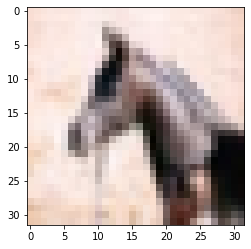

7


In [28]:
img = np.swapaxes(client1_X_train[3210],0,2)
label = client1_y_train[3210]

plt.imshow(img)
plt.show()
print(label)

In [19]:
x1 = np.array(client1_y_train)
x2 = np.array(client1_y_val)

u1,c1 = np.unique(x1, return_counts=True)
u2,c2 = np.unique(x2, return_counts=True)

In [20]:
u1, c1

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([3512, 3540, 3522, 3523, 3458, 3434, 3554, 3457]))

In [21]:
u2,c2

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([1488, 1460, 1478, 1477, 1542, 1566, 1446, 1543]))

In [8]:
client1_trainDL = DataLoader(list(zip(client1_X_train, client1_y_train)), batch_size = 20, shuffle = True)
client1_valDL = DataLoader(list(zip(client1_X_val, client1_y_val)), batch_size = 100)

client2_trainDL = DataLoader(list(zip(client2_X_train, client2_y_train)), batch_size = 20, shuffle = True)
client2_valDL = DataLoader(list(zip(client2_X_val, client2_y_val)), batch_size = 100)

In [9]:
client1_model = VGG11(num_classes=8).to('cuda')
client2_model = VGG11(num_classes=2).to('cuda')

client1_optim = torch.optim.Adam(client1_model.parameters(), lr = 0.0001)
client2_optim = torch.optim.Adam(client2_model.parameters(), lr = 0.0001)

loss_fn = nn.CrossEntropyLoss()

In [10]:
EPOCHS = 30

client1_step_size_train = len(client1_trainDL)
client1_step_size_val = len(client1_valDL)

history_client1 = {'train loss': [], 'val loss': [], 'train acc': [], 'val acc': [] }

for epoch in range(EPOCHS):

    train_loss = 0
    val_loss = 0
    train_accuracy = 0
    val_accuracy = 0

    client1_model.train()

    for (x,y) in client1_trainDL:

        pred = client1_model(x.float().to('cuda'))
        # print(pred, y)
        loss = loss_fn(pred, y.to('cuda'))

        client1_optim.zero_grad()
        loss.backward()
        client1_optim.step()

        train_loss += loss
        # print("***Accuracy*** : ",(pred.argmax(1) == y.to('cuda')).type(torch.float).sum().item())
        train_accuracy += (pred.argmax(1) == y.to('cuda')).type(torch.float).sum().item()/client1_trainDL.batch_size

    epoch_train_loss = train_loss/client1_step_size_train
    epoch_train_accuracy = train_accuracy/client1_step_size_train
    history_client1['train acc'].append(epoch_train_accuracy)
    history_client1['train loss'].append(epoch_train_loss)

    with torch.no_grad():
        client1_model.eval()
        for (x,y) in client1_valDL:
            pred = client1_model(x.float().to('cuda'))
            val_loss += loss_fn(pred, y.to('cuda'))
            val_accuracy += (pred.argmax(1) == y.to('cuda')).type(torch.float).sum().item()/client1_valDL.batch_size

        epoch_val_loss = val_loss/client1_step_size_val
        epoch_val_accuracy = val_accuracy/client1_step_size_val
        history_client1['val loss'].append(epoch_val_loss)
        history_client1['val acc'].append(epoch_val_accuracy)


        print("\n-----------------------------------EPOCH ",epoch + 1,"-----------------------------------")
        print("Train loss: ",epoch_train_loss.detach().cpu().numpy(),"\t\t\tTrain accuracy: ", epoch_train_accuracy)
        print("Validation loss: ", epoch_val_loss.detach().cpu().numpy(),"\t\tValidation accuracy: ", epoch_val_accuracy)      


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)



-----------------------------------EPOCH  1 -----------------------------------
Train loss:  2.050788 			Train accuracy:  0.1383928571428572
Validation loss:  1.9700108 		Validation accuracy:  0.2045833333333334

-----------------------------------EPOCH  2 -----------------------------------
Train loss:  1.9883006 			Train accuracy:  0.17242857142857088
Validation loss:  1.808704 		Validation accuracy:  0.3788333333333331

-----------------------------------EPOCH  3 -----------------------------------
Train loss:  1.9471018 			Train accuracy:  0.196285714285714
Validation loss:  1.7480192 		Validation accuracy:  0.4416666666666666

-----------------------------------EPOCH  4 -----------------------------------
Train loss:  1.9110639 			Train accuracy:  0.20982142857142824
Validation loss:  1.6458061 		Validation accuracy:  0.4969166666666666

-----------------------------------EPOCH  5 -----------------------------------
Train loss:  1.8766012 			Train accuracy:  0.22574999999999976
V

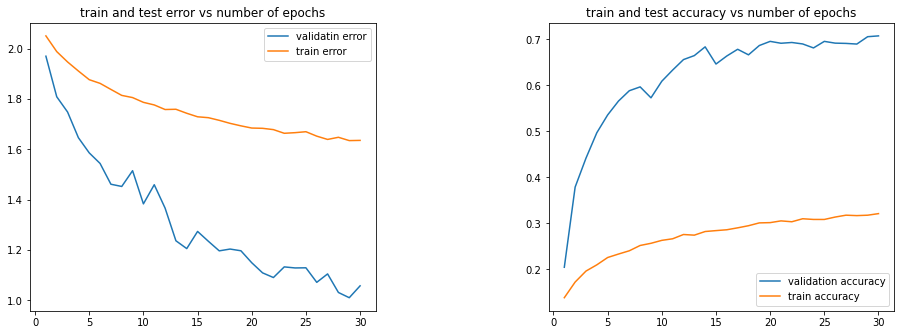

In [11]:
plt.subplot(1,2,1)
plt.plot(range(1,len(history_client1['val loss'])+1),[x.detach().cpu().numpy() for x in history_client1["val loss"]])
plt.plot(range(1,len(history_client1['train loss'])+1), [x.detach().cpu().numpy() for x in history_client1["train loss"]])
plt.title("train and test error vs number of epochs")
plt.legend(["validatin error", "train error"], loc ="best")

plt.subplot(1,2,2)
plt.plot(range(1,len(history_client1['val acc'])+1), history_client1["val acc"])
plt.plot(range(1,len(history_client1['train acc'])+1), history_client1["train acc"])
plt.title("train and test accuracy vs number of epochs")
plt.legend(["validation accuracy", "train accuracy"], loc ="best")

plt.subplots_adjust(left=1,
                    bottom=2, 
                    right=3, 
                    top=3, 
                    wspace=0.5, 
                    hspace=0.1)

plt.show()